In [2]:
# run this to shorten the data import from the files
import os
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [3]:
# exercise 01

"""
Which model is best?

Imagine you built 4 models:

A: A model with 10 variables that has an AUC of 0.76 B: A model with 10 variables that has an AUC of 0.73 C: A model with 15 variables that has an AUC of 0.76 D: A model with 15 variables that has an AUC of 0.73

Which model is best, assuming all variables are equally easy to calculate and maintain.
"""

# Instructions

"""
Model A (Answer)


Model B


Model C


Model D
"""

# solution



#----------------------------------#

# Conclusion

"""
Correct! This is the least complex model with best performance.
"""

'\nCorrect! This is the least complex model with best performance.\n'

In [4]:
from joblib import dump, load
logreg = load('logreg.joblib')

In [5]:
import pandas as pd
basetable = pd.read_csv(path_data+'basetable_ex2_4.csv')
basetable.head()

,target,gender_F,income_high,income_low,country_USA,country_India,country_UK,age,time_since_last_gift,time_since_first_gift,max_gift,min_gift,mean_gift,number_gift
0,0,1,0,1,0,1,0,65,530,2265,166.0,87.0,116.00,7
1,0,1,0,0,0,1,0,71,715,715,90.0,90.0,90.00,1
2,0,1,0,0,0,1,0,28,150,1806,125.0,74.0,96.00,9
3,0,1,0,1,1,0,0,52,725,2274,117.0,97.0,104.25,4
4,0,1,1,0,1,0,0,82,805,805,80.0,80.0,80.00,1


In [6]:
X = basetable[['age', 'gender_F', 'time_since_last_gift']]
y = basetable['target']

In [7]:
# exercise 02

"""
Calculating AUC

The AUC value assesses how well a model can order observations from low probability to be target to high probability to be target. In Python, the roc_auc_score function can be used to calculate the AUC of the model. It takes the true values of the target and the predictions as arguments.

You will make predictions again, before calculating its roc_auc_score.
"""

# Instructions

"""

    The model logreg from the last chapter has been created and fitted for you, the DataFrame X contains the predictor columns of the basetable. Make predictions for the objects in the basetable.
    Select the second column of predictions, as it contains the predictions for the target.
    The true values of the target are loaded in y. Use the roc_auc_score function to calculate the AUC of the model.

"""

# solution
from sklearn.metrics import roc_auc_score
# Make predictions
predictions = logreg.predict_proba(X)
predictions_target = predictions[:,1]

# Calculate the AUC value
auc = roc_auc_score(y, predictions_target)
print(round(auc,2))

#----------------------------------#

# Conclusion

"""
Nice! An AUC of 0.69 is a typical result for this type of cases. Let's check if we can improve using different sets of variables.
"""

0.63


"\nNice! An AUC of 0.69 is a typical result for this type of cases. Let's check if we can improve using different sets of variables.\n"

In [8]:
# exercise 03

"""
Using different sets of variables

Adding more variables and therefore more complexity to your logistic regression model does not automatically result in more accurate models. In this exercise you can verify whether adding 3 variables to a model leads to a more accurate model.

variables_1 and variables_2 are available in your environment: you can print them to the console to explore what they look like.
"""

# Instructions

"""

    Fit the logreg model using variables_2 which contains 3 additional variables compared to variables_1.
    Make predictions for this model.
    Calculate the AUC of this model.

"""

from sklearn import linear_model

# solution
variables_1 = ['mean_gift', 'income_low']
variables_2 = ['mean_gift', 'income_low', 'gender_F', 'country_India', 'age']
# Create appropriate DataFrames
X_1 = basetable[variables_1]
X_2 = basetable[variables_2]
y = basetable['target'].values

# Create the logistic regression model
logreg = linear_model.LogisticRegression()

# Make predictions using the first set of variables and assign the AUC to auc_1
logreg.fit(X_1, y)
predictions_1 = logreg.predict_proba(X_1)[:,1]
auc_1 = roc_auc_score(y, predictions_1)

# Make predictions using the second set of variables and assign the AUC to auc_2
logreg.fit(X_2, y)
predictions_2 = logreg.predict_proba(X_2)[:,1]
auc_2 = roc_auc_score(y, predictions_2)

# Print auc_1 and auc_2
print(round(auc_1,2))
print(round(auc_2,2))

#----------------------------------#

# Conclusion

"""
Well done. You can see that the model with 5 variables has the same AUC as the model using only 2 variables. Adding more variables doesn't always increase the AUC.
"""

0.68
0.69


"\nWell done. You can see that the model with 5 variables has the same AUC as the model using only 2 variables. Adding more variables doesn't always increase the AUC.\n"

In [9]:
def auc(variables, target, basetable):
    X = basetable[variables]
    Y = basetable[target]
    logreg = linear_model.LogisticRegression()
    logreg.fit(X, Y)
    predictions = logreg.predict_proba(X)[:,1]
    auc = roc_auc_score(Y, predictions)
    return(auc)

In [10]:
def next_best(current_variables,candidate_variables, target, basetable):
    best_auc = -1
    best_variable = None
    
	# Calculate the auc score of adding v to the current variables
    for v in candidate_variables:
        auc_v = auc(current_variables + [v], target, basetable)
        
		# Update best_auc and best_variable adding v led to a better auc score
        if auc_v >= best_auc:
            best_auc = auc_v
            best_variable = v
            
    return best_variable


In [11]:
# exercise 04

"""
Selecting the next best variable

The forward stepwise variable selection method starts with an empty variable set and proceeds in steps, where in each step the next best variable is added. To implement this procedure, two handy functions have been implemented for you.

The auc function calculates for a given variable set variables the AUC of the model that uses this variable set as predictors. The next_best function calculates which variable should be added in the next step to the variable list.

In this exercise, you will experiment with these functions to better understand their purpose. You will calculate the AUC of a given variable set, calculate which variable should be added next, and verify that this indeed results in an optimal AUC.
"""

# Instructions

"""

    The auc function has been implemented for you. Calculate the AUC of a model that uses "max_gift", "mean_gift" and "min_gift" as predictors. You should pass these variables in a list as the first argument to the auc function.
    The next_best function has been implemented for you. Calculate which variable should be added next, given that "max_gift", "mean_gift" and "min_gift" are currently in the model, and "age" and "gender_F" are the candidate next predictors. The first argument of the next_best function is a list with the current variables, while the second argument is a list with the candidate predictors.
    Calculate the AUC of a model that uses "max_gift", "mean_gift", "min_gift" and "age" as predictors.
    Calculate the AUC of a model that uses "max_gift", "mean_gift", "min_gift" and "gender_F" as predictors.

"""

# solution

# Calculate the AUC of a model that uses "max_gift", "mean_gift" and "min_gift" as predictors
auc_current = auc(['max_gift', 'mean_gift', 'min_gift'], 'target', basetable)
print(round(auc_current,4))

# Calculate which variable among "age" and "gender_F" should be added to the variables "max_gift", "mean_gift" and "min_gift"
next_variable = next_best(['max_gift', 'mean_gift', 'min_gift'], ['age', 'gender_F'], 'target', basetable)
print(next_variable)

# Calculate the AUC of a model that uses "max_gift", "mean_gift", "min_gift" and "age" as predictors
auc_current_age = auc(['max_gift', 'mean_gift', 'min_gift', 'age'], 'target', basetable)
print(round(auc_current_age,4))

# Calculate the AUC of a model that uses "max_gift", "mean_gift", "min_gift" and "gender_F" as predictors
auc_current_gender_F = auc(['max_gift', 'mean_gift', 'min_gift', 'gender_F'], 'target', basetable)
print(round(auc_current_gender_F,4))

#----------------------------------#

# Conclusion

"""
Nice! The model that has age as next variable has a better AUC than the model that has gender_F as next variable. Therefore, age is selected as the next best variable.
"""

0.7126
age
0.7149
0.7131


'\nNice! The model that has age as next variable has a better AUC than the model that has gender_F as next variable. Therefore, age is selected as the next best variable.\n'

In [12]:
# exercise 05

"""
Finding the order of variables

The forward stepwise variable selection procedure starts with an empty set of variables, and adds predictors one by one. In each step, the predictor that has the highest AUC in combination with the current variables is selected.

In this exercise you will learn to implement the forward stepwise variable selection procedure. To this end, you can use the next_best function that has been implemented for you. It can be used as follows:

next_best(current_variables,candidate_variables,target,basetable)

where current_variables is the list of variables that is already in the model and candidate_variables the list of variables that can be added next.
"""

# Instructions

"""

    Use the function next_best to calculate the next best variable and assign it to next_variable.
    Update the current_variables list.
    Update the candidate_variables list.

"""

# solution

# Find the candidate variables
candidate_variables = list(basetable.columns.values)
candidate_variables.remove("target")

# Initialize the current variables
current_variables = []

# The forward stepwise variable selection procedure
number_iterations = 5
for i in range(0, number_iterations):
    next_variable = next_best(current_variables, candidate_variables, "target", basetable)
    current_variables = current_variables + [next_variable]
    candidate_variables.remove(next_variable)
    print("Variable added in step " + str(i+1)  + " is " + next_variable + ".")
print(current_variables)


#----------------------------------#

# Conclusion

"""
Great job!
"""

Variable added in step 1 is max_gift.
Variable added in step 2 is number_gift.
Variable added in step 3 is time_since_last_gift.
Variable added in step 4 is mean_gift.


/home/nero/Documents/Estudos/estudos/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Variable added in step 5 is age.
['max_gift', 'number_gift', 'time_since_last_gift', 'mean_gift', 'age']


'\nGreat job!\n'

In [13]:
# exercise 06

"""
Correlated variables

The first 10 variables that are added to the model are the following:

['max_gift', 'number_gift', 'time_since_last_gift', 'mean_gift', 'income_high', 'age', 'country_USA', 'gender_F', 'income_low', 'country_UK']

As you can see, min_gift is not added. Does this mean that it is a bad variable? You can test the performance of the variable by using it in a model as a single variable and calculating the AUC. How does the AUC of min_gift compare to the AUC of income_high? To this end, you can use the function auc():

auc(variables, target, basetable)

It can happen that a good variable is not added because it is highly correlated with a variable that is already in the model. You can test this calculating the correlation between these variables:

import numpy
numpy.corrcoef(basetable["variable_1"],basetable["variable_2"])[0,1]

"""

# Instructions

"""

    Calculate the AUC of the model using the variable min_gift only.
    Calculate the AUC of the model using the variable income_high only.
    Calculate the correlation between the variable min_gift and mean_gift.

"""

# solution

import numpy as np

# Calculate the AUC of the model using min_gift only
auc_min_gift = auc(['min_gift'], 'target', basetable)
print(round(auc_min_gift,2))

# Calculate the AUC of the model using income_high only
auc_income_high = auc(['income_high'], 'target', basetable)
print(round(auc_income_high,2))

# Calculate the correlation between min_gift and mean_gift
correlation = np.corrcoef(basetable["min_gift"], basetable["mean_gift"])[0,1]
print(round(correlation,2))

#----------------------------------#

# Conclusion

"""
Well done! You can observe that min_gift has more predictive power than income_high, but that it is highly correlated with mean_gift and therefore not included in the selected variables.
"""

0.57
0.52
0.76


'\nWell done! You can observe that min_gift has more predictive power than income_high, but that it is highly correlated with mean_gift and therefore not included in the selected variables.\n'

In [14]:
# exercise 07

"""
Partitioning

In order to properly evaluate a model, one can partition the data in a train and test set. The train set contains the data the model is built on, and the test data is used to evaluate the model. This division is done randomly, but when the target incidence is low, it could be necessary to stratify, that is, to make sure that the train and test data contain an equal percentage of targets.

In this exercise you will partition the data with stratification and verify that the train and test data have equal target incidence. The train_test_split method has already been imported, and the X and y DataFrames are available in your workspace.
"""

# Instructions

"""

    Stratify these DataFrames using the train_test_split method. Make sure that train and test set are the same size, and have equal target incidence.
    Calculate the target incidence of the train set. This is the number of targets in the train set divided by the number of observations in the train set.
    Calculate the target incidence of the test set.

"""

# solution

# Load the partitioning module
from sklearn.model_selection import train_test_split

# Create DataFrames with variables and target
X = basetable.drop("target", axis=1)
y = basetable["target"]

# Carry out 50-50 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Check whether train and test have same percentage targets
print(round(sum(train['target'])/len(train), 2))
print(round(sum(test['target'])/len(test), 2))

#----------------------------------#

# Conclusion

"""
Splendid! The stratify option makes sure the target incidence is the same in both train and test.
"""

0.05
0.05


'\nSplendid! The stratify option makes sure the target incidence is the same in both train and test.\n'

In [15]:
def auc_train_test(variables, target, train, test):
    X_train = train[variables]
    X_test = test[variables]
    y_train = train[target]
    y_test = test[target]
    logreg = linear_model.LogisticRegression(max_iter= 10000)
    
    # Fit the model on train data
    logreg.fit(X_train, y_train)
    
    # Calculate the predictions both on train and test data
    predictions_train = logreg.predict_proba(X_train)[:,1]
    predictions_test = logreg.predict_proba(X_test)[:,1]
    
    # Calculate the AUC both on train and test data
    auc_train = roc_auc_score(y_train, predictions_train)
    auc_test = roc_auc_score(y_test,predictions_test)
    return(auc_train, auc_test)

In [16]:
# exercise 08

"""
Evaluating a model on test and train

The function auc_train_test calculates the AUC of model that is built on a train set and evaluated on a test set:

auc_train, auc_test = auc_train_test(variables, target, train, test)

with variables a list of the names of the variables that is used in the model.

In this exercise, you will apply this function, and check whether the train and test AUC are similar.
"""

# Instructions

"""

    The basetable is loaded. Partition the basetable such that the train set contains 70% of the data, and make sure that train and test set have equal target incidence.
    Calculate the train and test AUC of the model using "age" and "gender_F" as predictors using the auc_train_test function.

"""

# solution

# Load the partitioning module
from sklearn.model_selection import train_test_split

# Create DataFrames with variables and target
X = basetable.drop('target', axis=1)
y = basetable["target"]

# Carry out 70-30 partititioning with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

# Create the final train and test basetables
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

 # Apply the auc_train_test function
auc_train, auc_test = auc_train_test(['age', 'gender_F'], "target", train, test)
print(round(auc_train,2))
print(round(auc_test,2))

#----------------------------------#

# Conclusion

"""
Great work! It could happen that the test AUC is slightly lower than the train AUC. This is a perfectly normal phenomenon called over-fitting.
"""

0.54
0.54


'\nGreat work! It could happen that the test AUC is slightly lower than the train AUC. This is a perfectly normal phenomenon called over-fitting.\n'

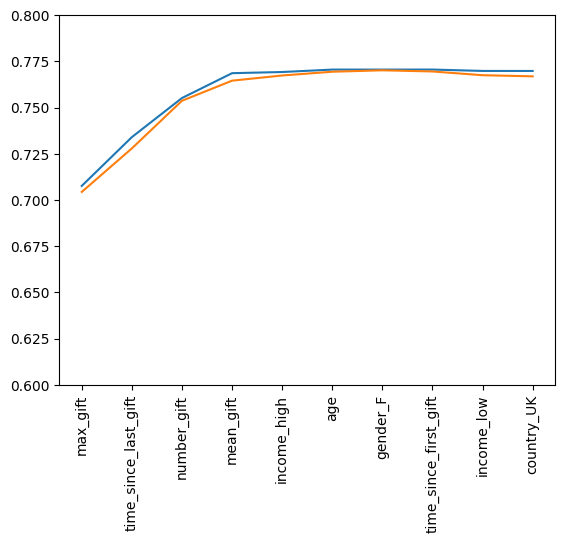

'\nYou rock! Note that the test AUC curve starts declining sooner than the train curve. The point at which this happens is a good cut-off.\n'

In [17]:
# exercise 09

"""
Building the AUC curves

The forward stepwise variable selection procedure provides an order in which variables are optimally added to the predictor set. In order to decide where to cut off the variables, you can make the train and test AUC curves. These curves plot the train and test AUC using the first, first two, first three, … variables in the model.

In this exercise you will learn to plot these AUC curves. The method auc_train_test to calculate the AUC values has been implemented for you and can be used as follows:

auc_train, auc_test = auc_train_test(variables, target, train, test)

where variables is the set of variables used in the logistic regression model, target is a list with the target name, and train and test are the train and test basetable respectively.

The variables ordered according to the forward stepwise procedure are given in the list variables. You can explore it in the console. Additionally, three empty lists have been defined for you:

    auc_values_train, which will contain the train AUC values of the model at each iteration
    auc_values_test, which will contain the test AUC values of the model at each iteration
    variables_evaluate, which will contain the variables evaluated at each iteration

"""

# Instructions

"""

    Iterate over the variables.
    In each iteration, add the next variable in variables to variables_evaluate.
    In each iteration, calculate the train and test AUC using the auc_train_test method. The DataFrames train and test contain the train and test data respectively.
    In each iteration, add the calculated values to auc_values_train and auc_values_test

"""

# solution

variables = ['max_gift', 'time_since_last_gift', 'number_gift', 'mean_gift', 'income_high', 'age', 'gender_F', 'time_since_first_gift', 'income_low', 'country_UK']

# Keep track of train and test AUC values
auc_values_train = []
auc_values_test = []
variables_evaluate = []

# Iterate over the variables in variables
for v in variables:
  
    # Add the variable
    variables_evaluate.append(v)
    
    # Calculate the train and test AUC of this set of variables
    auc_train, auc_test = auc_train_test(variables_evaluate, "target", train, test)
    
    # Append the values to the lists
    auc_values_train.append(auc_train)
    auc_values_test.append(auc_test)

import matplotlib.pyplot as plt
    
x = np.array(range(0,len(auc_values_train)))
y_train = auc_values_train
y_test = auc_values_test
plt.xticks(x, variables, rotation = 90)
plt.plot(x,y_train)
plt.plot(x,y_test)
plt.ylim((0.6, 0.8))
plt.show()

#----------------------------------#

# Conclusion

"""
You rock! Note that the test AUC curve starts declining sooner than the train curve. The point at which this happens is a good cut-off.
"""

In [18]:
# exercise 10

"""
Deciding the cut-off

The forward stepwise variable selection results in the following AUC values. How many variables should be included in the model?

(image named curve.png)
"""

# Instructions

"""
15 variables, the train AUC is highest at this point.


10 variables, the test AUC starts decreasing at this point.


8 variables, the test AUC does not increase after this point and it is better to have less complex models.(Answer)


"""

# solution



#----------------------------------#

# Conclusion

"""
Correct!
"""

'\nCorrect!\n'